## Importing Essential Libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

## Reading the CSV file, checking for unique values, null values

In [2]:
df = pd.read_csv(r'E:\Learning Data Science With Python\Data Science 104 - Machine Learning Models\Data Science 104 - Decision Trees\car_evaluation.csv')

In [3]:
df.head()

,Price,Maintenance,Doors,Persons,Boot,Safety,Class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
for col in df:
    print(df[col].value_counts())

Price
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
Maintenance
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
Doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
Persons
2       576
4       576
more    576
Name: count, dtype: int64
Boot
small    576
med      576
big      576
Name: count, dtype: int64
Safety
low     576
med     576
high    576
Name: count, dtype: int64
Class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


## Encoding the Data for Decision Tree Classifier.

* Decision Trees work primarily on numeric data. 
* Categorical data can be encoded in multiple ways.
* We are using the LabelEncoder() module from sklearn.preprocessing in this example.

In [5]:
le = LabelEncoder()
encoded_Price = le.fit_transform(df['Price'])
encoded_Maintenance = le.fit_transform(df['Maintenance'])
encoded_Doors = le.fit_transform(df['Doors'])
encoded_Persons = le.fit_transform(df['Persons'])
encoded_Boot = le.fit_transform(df['Boot'])
encoded_Safety = le.fit_transform(df['Safety'])
encoded_Class = le.fit_transform(df['Class'])
df['Price'] = encoded_Price
df['Maintenance'] = encoded_Maintenance
df['Doors'] = encoded_Doors
df['Persons'] = encoded_Persons
df['Boot'] = encoded_Boot
df['Safety'] = encoded_Safety
df['Class'] = encoded_Class

In [6]:
df.head()

,Price,Maintenance,Doors,Persons,Boot,Safety,Class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [7]:
for col in df:
    print(df[col].value_counts())

Price
3    432
0    432
2    432
1    432
Name: count, dtype: int64
Maintenance
3    432
0    432
2    432
1    432
Name: count, dtype: int64
Doors
0    432
1    432
2    432
3    432
Name: count, dtype: int64
Persons
0    576
1    576
2    576
Name: count, dtype: int64
Boot
2    576
1    576
0    576
Name: count, dtype: int64
Safety
1    576
2    576
0    576
Name: count, dtype: int64
Class
2    1210
0     384
1      69
3      65
Name: count, dtype: int64


## Starting our Classification with Decision Trees

* We will first drop the target variable and assign it to the 'y' variable.

In [8]:
x = df.drop('Class', axis='columns')
y = df['Class']

* Here, we will split the data 80% for training and 20% for testing.
* The random_state parameter helps us with reproducability of the code.

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 69)

In [10]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1382, 6), (346, 6), (1382,), (346,))

* We will use the 'gini' criterion for our decision tree. 
* We can also use the 'entropy' criterion.
* These parameters are mathematical computations for information gain. The lesser the information gain, the lower the accuracy of the model.
* Thus, it is better for us to choose a model with a higher information gain.

In [23]:
model = DecisionTreeClassifier(criterion = 'gini', max_depth=3, random_state = 69)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=69)

* We will now predict the accuracy of the model.
* An Accuracy score of 80-85% is a good measure. 
* We can fine-tune the parameters to achieve higher accuracy scores.
* For the sake of understanding, we will stick to what we get in our first iteration, and try to visualize the decision tree.

In [24]:
y_pred = model.predict(x_test)

In [25]:
print('Test Model Accuracy score with "gini" criterion is:', accuracy_score(y_test, y_pred) * 100)

Test Model Accuracy score with "gini" criterion is: 76.878612716763


* Our accuracy score is 76.87%, this is a really decent number for this model.
* We will now visualize the decision tree.

[Text(0.375, 0.875, 'x[3] <= 0.5\ngini = 0.465\nsamples = 1382\nvalue = [313, 58, 958, 53]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 452\nvalue = [0, 0, 452, 0]'),
 Text(0.5, 0.625, 'x[5] <= 0.5\ngini = 0.584\nsamples = 930\nvalue = [313, 58, 506, 53]'),
 Text(0.25, 0.375, 'x[0] <= 2.5\ngini = 0.637\nsamples = 311\nvalue = [165, 27, 66, 53]'),
 Text(0.125, 0.125, 'gini = 0.622\nsamples = 235\nvalue = [129, 27, 26, 53]'),
 Text(0.375, 0.125, 'gini = 0.499\nsamples = 76\nvalue = [36, 0, 40, 0]'),
 Text(0.75, 0.375, 'x[5] <= 1.5\ngini = 0.435\nsamples = 619\nvalue = [148, 31, 440, 0]'),
 Text(0.625, 0.125, 'gini = 0.0\nsamples = 313\nvalue = [0, 0, 313, 0]'),
 Text(0.875, 0.125, 'gini = 0.584\nsamples = 306\nvalue = [148, 31, 127, 0]')]

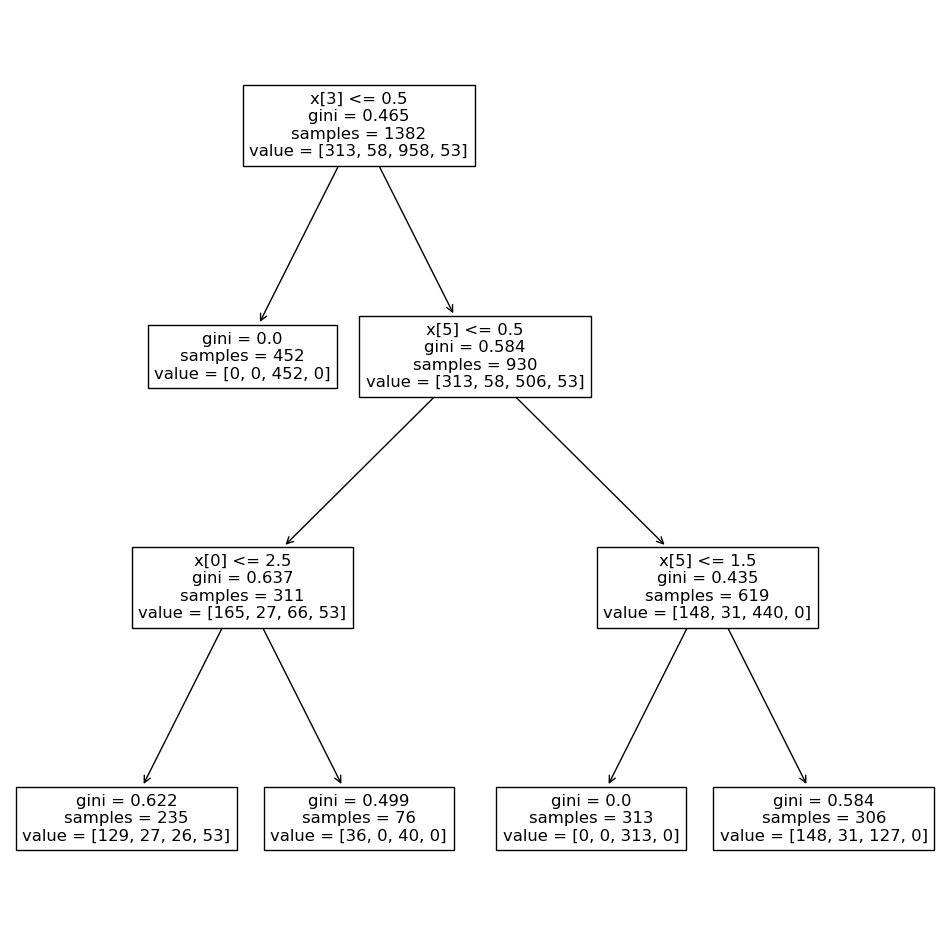

In [27]:
plt.figure(figsize=(12,12))
tree.plot_tree(model.fit(x_train,y_train))

## Insights

* Thus, we can see the final decision tree that has been generated for a maxmium depth of 3 levels.
* Understanding this visual can help us understand how the prediction is being made.
* If we increase the maximum depth, we can get a higher accuracy for our model.
* Thus, decision trees help a lot in classifying data.